In [1]:
# !pip install --upgrade seaborn
# !pip install tensorflow==2.16.1 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import tensorflow as tf

# To display all the coloumn of dataset
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("/kaggle/input/voicegender/voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
data['label'].value_counts()

label
male      1584
female    1584
Name: count, dtype: int64

# Checking the important feature 

In [6]:
group = data.groupby('label')

In [7]:
# Splitting dataset based on label.
female = group.get_group('female')
male = group.get_group('male')

In [8]:
male.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


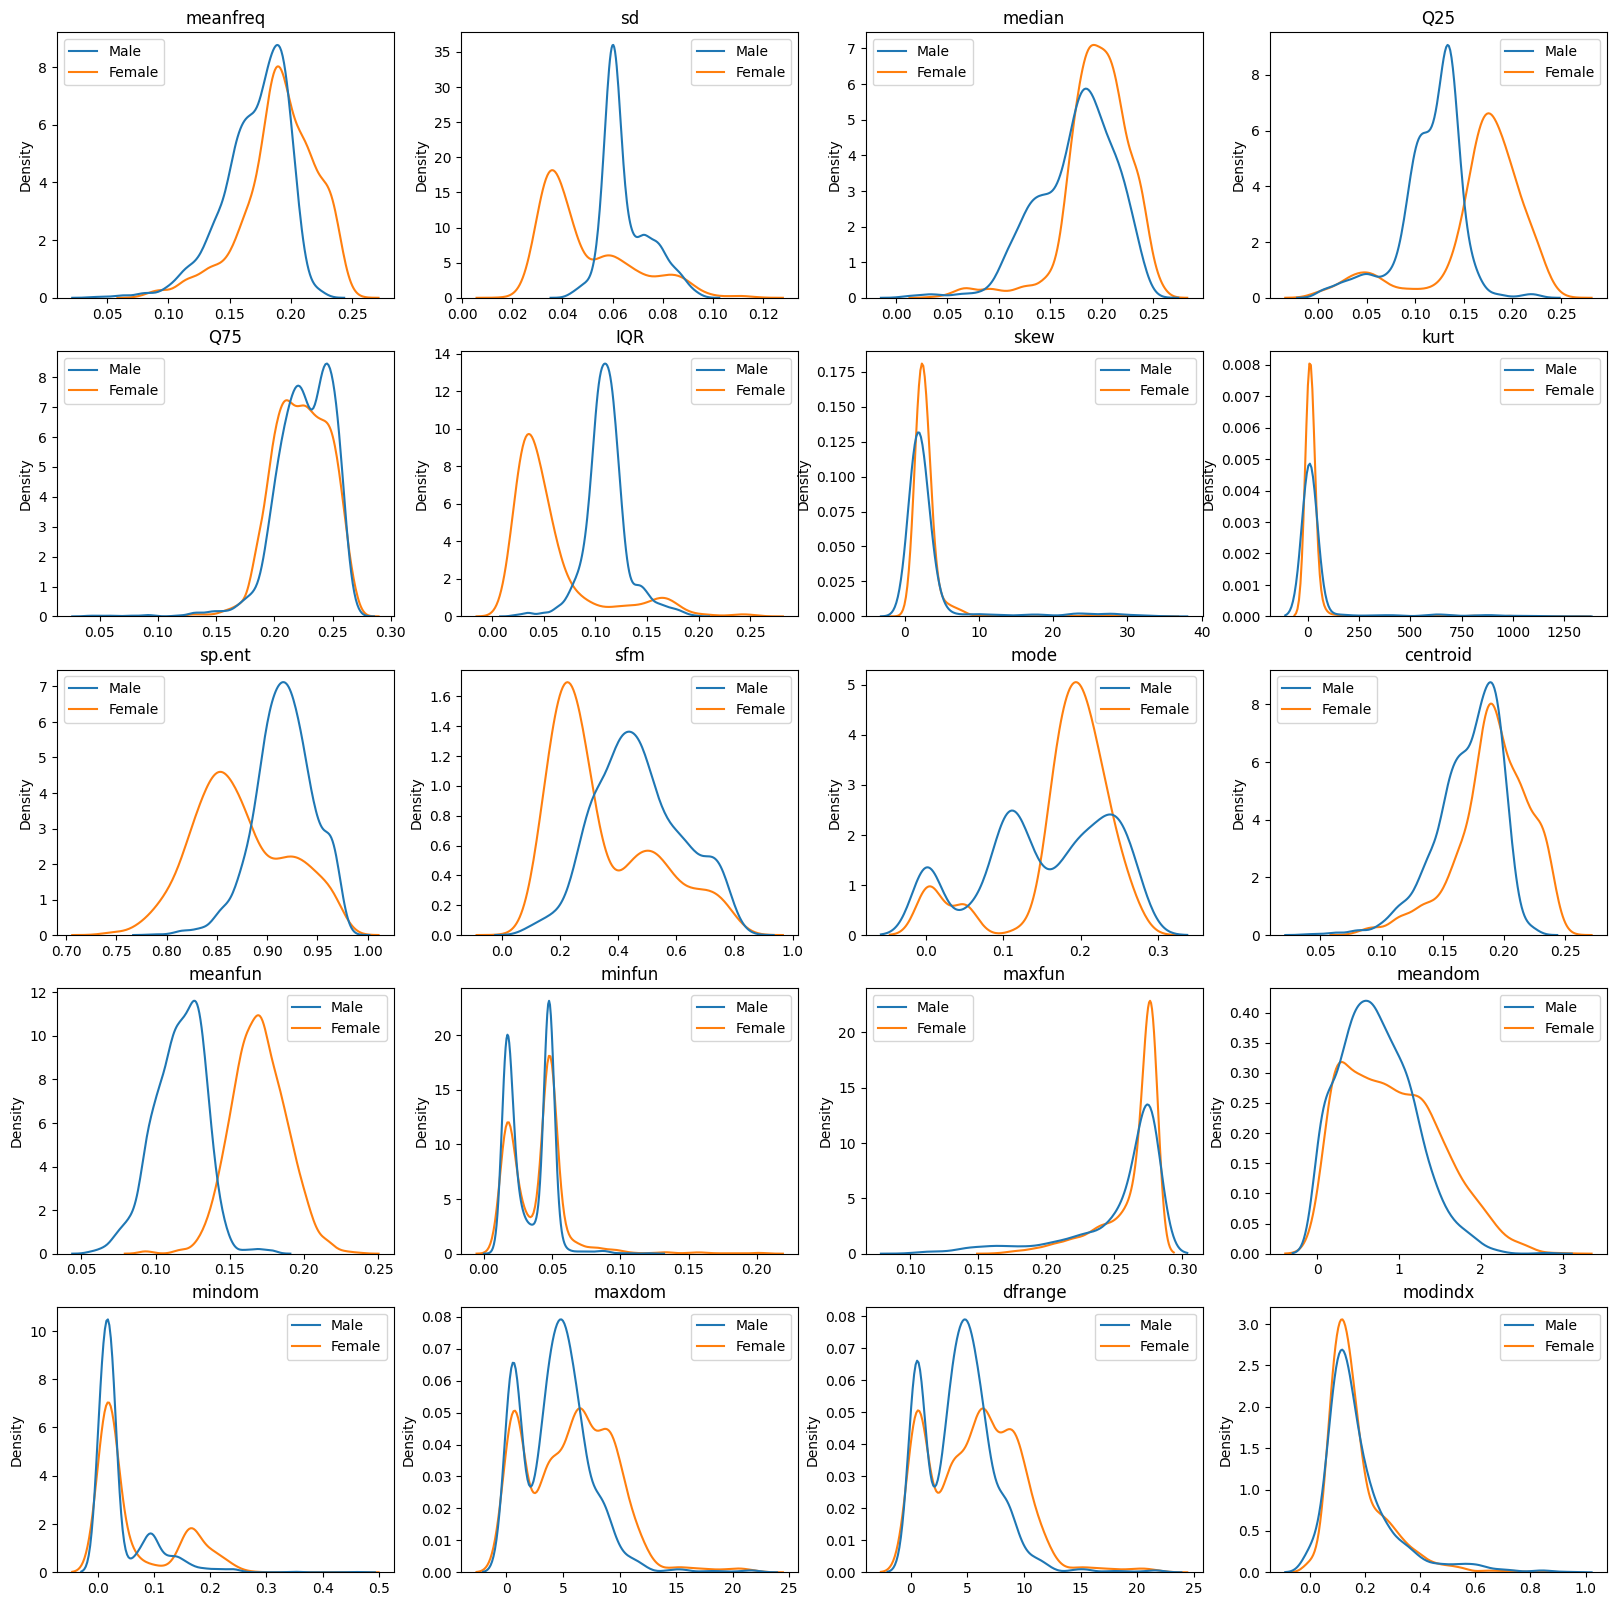

In [9]:
# Kernel Density Estimation (KDE) plots for each feature of the dataset.
fig, axes = plt.subplots(5, 4, figsize = (20, 20))
columns = data.columns[:-1]
k_index = 0
for axis in axes:
    for slot in axis:
        sns.kdeplot(data = {'Male': male[columns[k_index]], 'Female': female[columns[k_index]]}, ax = slot).set_title(columns[k_index])
        k_index += 1

### Observations: Clear class separability between 'Male' and 'Female' exhibited in the following features:

- sd - Standard Deviation of Frequency.
- IQR - Inter Quantile Range (in kHz)
- sp.ent - Spectral Entropy
- sfm - Spectral Flatness
- meanfun - Average of fundamental frequency measured across acoustic signal.

In [10]:
# Creating a new DataFrame based on features that exhibit clear class separation between 'Male' and 'Female'.
data = pd.DataFrame(data, columns = ['sd', 'IQR', 'sp.ent', 'sfm', 'meanfun', 'label'])
data.head()

,sd,IQR,sp.ent,sfm,meanfun,label
0,0.064241,0.075122,0.893369,0.491918,0.084279,male
1,0.067310,0.073252,0.892193,0.513724,0.107937,male
2,0.083829,0.123207,0.846389,0.478905,0.098706,male
3,0.072111,0.111374,0.963322,0.727232,0.088965,male
4,0.079146,0.127325,0.971955,0.783568,0.106398,male


In [34]:
male[['sd', 'IQR', 'sp.ent', 'sfm', 'meanfun', 'label']].describe()

,sd,IQR,sp.ent,sfm,meanfun
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.065110,0.110784,0.917188,0.471670,0.115872
std,0.009455,0.020415,0.028938,0.150473,0.017179
min,0.041747,0.021841,0.786650,0.080963,0.055565
25%,0.058957,0.100960,0.899557,0.363316,0.104171
50%,0.061781,0.109940,0.917309,0.461636,0.117254
75%,0.070915,0.119331,0.936048,0.576902,0.128236
max,0.096030,0.196168,0.981997,0.831347,0.179051


In [35]:
female[['sd', 'IQR', 'sp.ent', 'sfm', 'meanfun', 'label']].describe()

,sd,IQR,sp.ent,sfm,meanfun
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.049142,0.057834,0.873066,0.344763,0.169742
std,0.018380,0.042924,0.047288,0.179854,0.018460
min,0.018363,0.014558,0.738651,0.036876,0.091912
25%,0.034977,0.031106,0.839784,0.208125,0.157395
50%,0.041965,0.042689,0.865861,0.277228,0.169408
75%,0.060452,0.061268,0.908557,0.478122,0.181832
max,0.115273,0.252225,0.978482,0.842936,0.237636


In [11]:
data['label'] = data['label'].astype(str)

# Encoding Labels

In [12]:
label_mapping = {'male': 1, 'female': 0}
data['label'] = data['label'].map(label_mapping)

In [13]:
data.head()

,sd,IQR,sp.ent,sfm,meanfun,label
0,0.064241,0.075122,0.893369,0.491918,0.084279,1
1,0.067310,0.073252,0.892193,0.513724,0.107937,1
2,0.083829,0.123207,0.846389,0.478905,0.098706,1
3,0.072111,0.111374,0.963322,0.727232,0.088965,1
4,0.079146,0.127325,0.971955,0.783568,0.106398,1


# Spliting the Dataset

In [14]:
X = data.drop('label', axis = 1)
y = data['label']

In [15]:
X.head()

,sd,IQR,sp.ent,sfm,meanfun
0,0.064241,0.075122,0.893369,0.491918,0.084279
1,0.067310,0.073252,0.892193,0.513724,0.107937
2,0.083829,0.123207,0.846389,0.478905,0.098706
3,0.072111,0.111374,0.963322,0.727232,0.088965
4,0.079146,0.127325,0.971955,0.783568,0.106398


In [16]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

# Feature Scaling

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
import pickle as p
# Save the model to a file
with open('/kaggle/working/model_sc.pkl', 'wb') as f:
    p.dump(sc, f)

In [19]:
X

array([[ 0.4273553 , -0.21477826, -0.03908279,  0.4715753 , -1.81203825],
       [ 0.6116695 , -0.25848536, -0.06523603,  0.59443122, -1.07959443],
       [ 1.60384791,  0.90932569, -1.08373029,  0.39826097, -1.36536788],
       ...,
       [ 2.32272355,  2.49266553,  1.15019826,  1.38585653,  2.07778102],
       [ 2.012196  ,  2.15365344,  1.22984967,  1.50571108,  0.91544494],
       [ 2.14765111,  2.25467137,  0.97175912,  1.08912637,  1.32511084]])

# Spliting the dataset into train and test set 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X.shape

(3168, 5)

# Model Bulding & Model Training

In [22]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

output = tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [23]:
model = tf.keras.Model(inputs, output)

In [24]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name = 'auc')])

In [26]:
histroy = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100


I0000 00:00:1714460887.205022    3004 service.cc:145] XLA service 0x7cbc88006800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714460887.205064    3004 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1714460887.205068    3004 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


31/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - auc: 0.9119 - loss: 0.5691 

I0000 00:00:1714460888.099180    3004 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8889 - auc: 0.9430 - loss: 0.4785 - val_accuracy: 0.9724 - val_auc: 0.9936 - val_loss: 0.1399
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9706 - auc: 0.9940 - loss: 0.1246 - val_accuracy: 0.9744 - val_auc: 0.9947 - val_loss: 0.0860
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - auc: 0.9944 - loss: 0.0842 - val_accuracy: 0.9763 - val_auc: 0.9947 - val_loss: 0.0789
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - auc: 0.9972 - loss: 0.0658 - val_accuracy: 0.9744 - val_auc: 0.9951 - val_loss: 0.0792
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - auc: 0.9937 - loss: 0.0936 - val_accuracy: 0.9744 - val_auc: 0.9954 - val_loss: 0.0828
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - auc: 0.9974 - loss: 0.0595 - val_accuracy: 0.9744 - val_auc: 0.9956 - val_loss: 0.0778
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [27]:
model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9732 - auc: 0.9965 - loss: 0.0784


[0.06252766400575638, 0.9794952869415283, 0.9971516132354736]

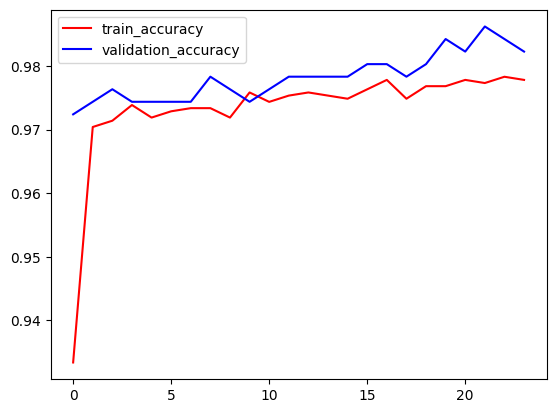

In [28]:
plt.plot(histroy.history['accuracy'], color='red', label='train_accuracy')
plt.plot(histroy.history['val_accuracy'], color='Blue', label='validation_accuracy')
plt.legend()
plt.show()

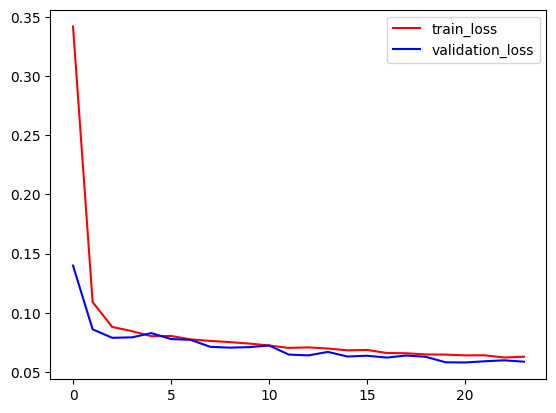

In [29]:
plt.plot(histroy.history['loss'], color='red', label='train_loss')
plt.plot(histroy.history['val_loss'], color='Blue', label='validation_loss')
plt.legend()
plt.show()

In [30]:
# Save the model in HDF5 format
model.save("model.h5")